# Partie 2

In [13]:
from math import pi, sin, tan, atan
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

t0, tf = 0, 100 # s
v0 = 10 # m/s
a, b = 1.1, 3.3 # m

y0, theta0 = 0, 0
t_interval = np.linspace(0, 100, 1000000)


A = np.matrix([[0, v0], 
               [0, 0]])

B = np.matrix([[(a/b)*v0],
               [v0/b]] )

C = np.matrix([1, 0])
D = np.matrix([0])

# 3. Control loop


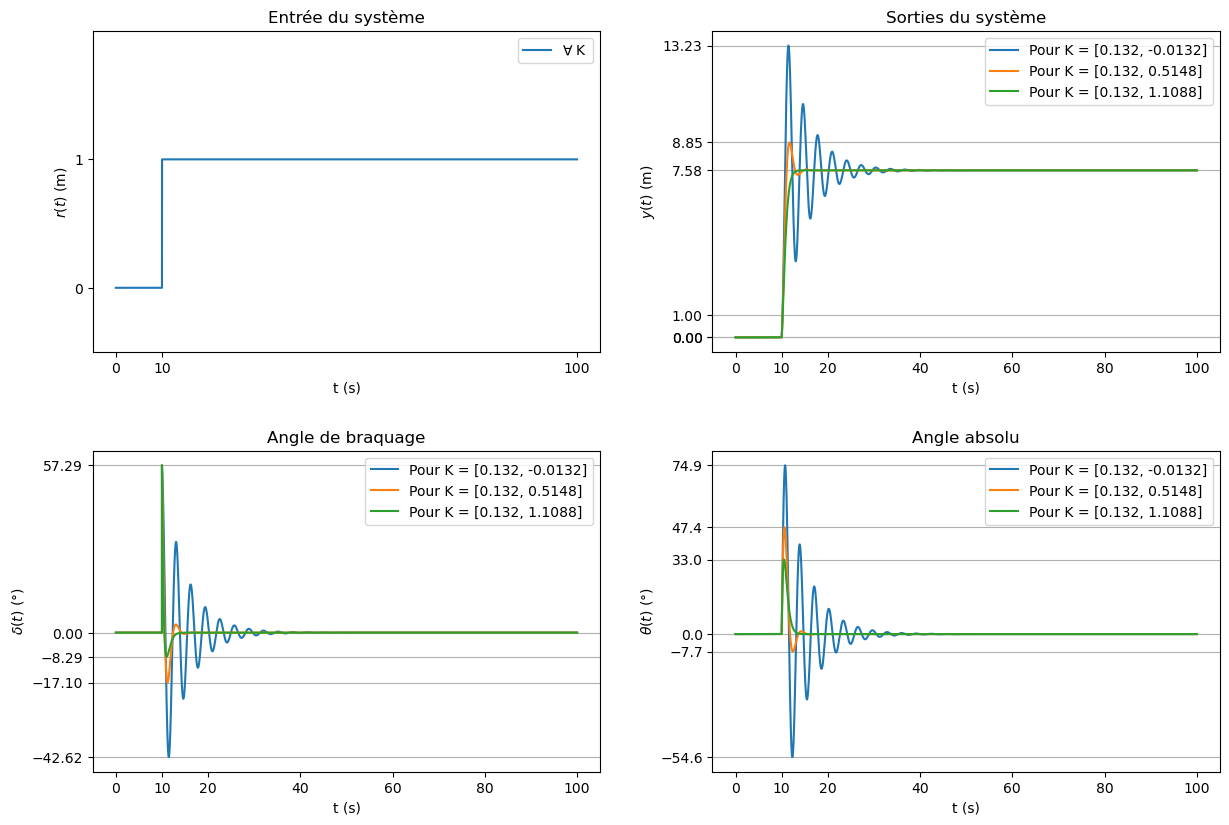

In [14]:
k_r = 1 


K_1 = np.matrix([[0.132, -0.0132]])
K_2 = np.matrix([[0.132, 0.5148]])
K_3 = np.matrix([[0.132, 1.1088]])


def syst_controle(t, y, r, K):
    Y = np.matrix([[y[0]], 
                   [y[1]]])
    # on calcule directement les 2 variables d'état
    matrice = np.matmul( (A-np.matmul(B,K)) , Y )  + ( (k_r*B) * r(t)  ) # ici (A-K*B) = A_tilde et (k_r*B) = B_tilde

    dy = matrice[0,0]
    dtheta = matrice[1,0]
    
    return dy, dtheta

def fonction_echellon(t):
    return t>= 0

def r_echellon(t):
    return fonction_echellon(t-10)



sortie_cible = r_echellon(t_interval)

sol_controle_1 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_1])
sol_controle_2 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_2])
sol_controle_3 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_3])


delta_matrice_1 = - (K_1 @ sol_controle_1["y"]) + (k_r * sortie_cible)
delta_matrice_2 = - (K_2 @ sol_controle_2["y"]) + (k_r * sortie_cible)
delta_matrice_3 = - (K_3 @ sol_controle_3["y"]) + (k_r * sortie_cible)

delta_tableau_1 = np.squeeze(np.asarray(delta_matrice_1)) # on passe sous forme de tableau pour utiliser matplotlib
delta_tableau_2 = np.squeeze(np.asarray(delta_matrice_2))
delta_tableau_3 = np.squeeze(np.asarray(delta_matrice_3))



fig, ax = plt.subplots(2, 2, figsize=(12, 8))
#fig.suptitle('Graphe des sorties et des deltas')
#fig.tight_layout()
fig.tight_layout(w_pad=5.0, h_pad=5.0)
ax[0, 0].plot(t_interval, sortie_cible, label=r'$\forall$ K')
ax[0, 0].set_title("Entrée du système")
ax[0,0].legend()
ax[0, 0].set_ylim(-0.5, 2)
ax[0,0].set_yticks([0,1])
ax[0,0].set_xticks([0,10,100])
ax[0, 0].set_xlabel("t (s)")
ax[0, 0].set_ylabel(r'$r(t)$ (m)')


ax[0, 1].plot(sol_controle_1["t"], sol_controle_1["y"][0], label =f'Pour K = {K_1.squeeze().tolist()[0]}')
ax[0, 1].plot(sol_controle_2["t"], sol_controle_2["y"][0], label =f'Pour K = {K_2.squeeze().tolist()[0]}')
ax[0, 1].plot(sol_controle_3["t"], sol_controle_3["y"][0], label =f'Pour K = {K_3.squeeze().tolist()[0]}')
ax[0, 1].set_yticks([0, 1, np.max(sol_controle_1["y"][0]), np.min(sol_controle_1["y"][0][11000:]), np.max(sol_controle_2["y"][0]), np.max(sol_controle_3["y"][0])])
ax[0, 1].set_xticks([0,10,20,40,60,80,100])
ax[0, 1].set_xlabel("t (s)")
ax[0, 1].set_ylabel(r'$y(t)$ (m)')
ax[0, 1].grid(axis='y')
ax[0, 1].set_title("Sorties du système")  
ax[0, 1].legend()

ax[1, 0].plot(t_interval, delta_tableau_1 * (180/np.pi), label=f'Pour K = {K_1.squeeze().tolist()[0]}')
ax[1, 0].plot(t_interval, delta_tableau_2 * (180/np.pi), label=f'Pour K = {K_2.squeeze().tolist()[0]}')
ax[1, 0].plot(t_interval, delta_tableau_3 * (180/np.pi), label=f'Pour K = {K_3.squeeze().tolist()[0]}')
ax[1, 0].set_yticks([0, np.min(delta_tableau_1 * (180/np.pi)), np.min(delta_tableau_2 * (180/np.pi)), np.min(delta_tableau_3 * (180/np.pi)), np.max(delta_tableau_3 * (180/np.pi))])
ax[1, 0].set_xticks([0,10,20,40,60,80,100])
ax[1, 0].grid(axis='y')
ax[1, 0].set_xlabel("t (s)")
ax[1, 0].set_ylabel(r'$\delta(t)$ (°)')
ax[1, 0].set_title("Angle de braquage")
ax[1, 0].legend()   

ax[1, 1].plot(sol_controle_1["t"], sol_controle_1["y"][1] * (180/np.pi), label =f'Pour K = {K_1.squeeze().tolist()[0]}')
ax[1, 1].plot(sol_controle_2["t"], sol_controle_2["y"][1] * (180/np.pi), label =f'Pour K = {K_2.squeeze().tolist()[0]}')
ax[1, 1].plot(sol_controle_3["t"], sol_controle_3["y"][1] * (180/np.pi), label =f'Pour K = {K_3.squeeze().tolist()[0]}')
ax[1, 1].set_yticks([0,np.max(sol_controle_1["y"][1] * (180/np.pi)), np.min(sol_controle_1["y"][1][11000:] * (180/np.pi)), np.max(sol_controle_2["y"][1] * (180/np.pi)), np.min(sol_controle_2["y"][1] * (180/np.pi)), np.max(sol_controle_3["y"][1] * (180/np.pi))])
ax[1, 1].set_xticks([0,10,20,40,60,80,100])
ax[1, 1].set_xlabel("t (s)")
ax[1, 1].set_ylabel(r'$\theta(t)$ (°)')
ax[1, 1].grid(axis='y')
ax[1, 1].set_title("Angle absolu")
ax[1, 1].legend()

plt.show()




Valeurs propres du système pour K1: [-0.2+1.98997487j -0.2-1.98997487j]
Valeurs propres du système pour K2: [-1.+1.73205081j -1.-1.73205081j]
Valeurs propres du système pour K3: [-1.9+0.6244998j -1.9-0.6244998j]


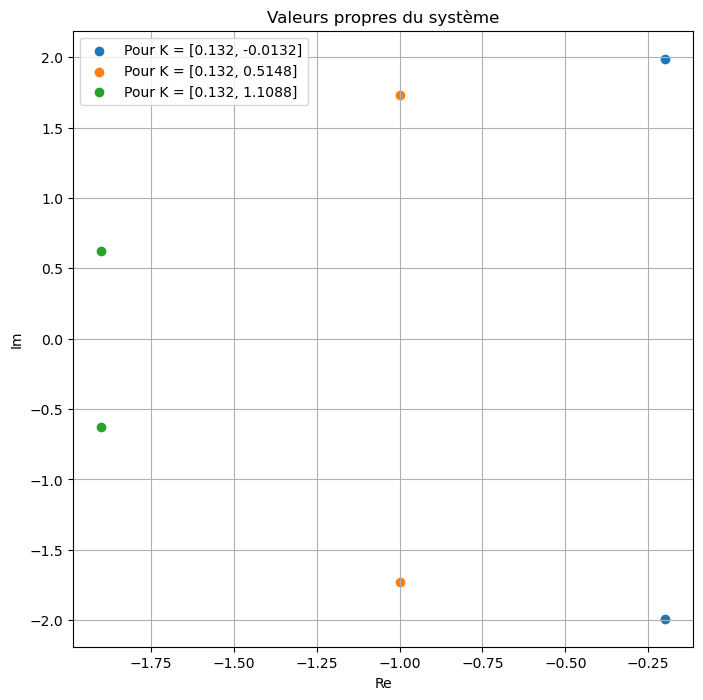

In [15]:
#Calcul des valeurs propres de A**tilde
valeurs_propres_K1 = np.linalg.eigvals(A - B @ K_1)
valeurs_propres_K2 = np.linalg.eigvals(A - B @ K_2)
valeurs_propres_K3 = np.linalg.eigvals(A - B @ K_3)
print("Valeurs propres du système pour K1:", valeurs_propres_K1)
print("Valeurs propres du système pour K2:", valeurs_propres_K2)
print("Valeurs propres du système pour K3:", valeurs_propres_K3)
#Plot des valeurs propres
plt.figure(figsize=(8, 8))
plt.title("Valeurs propres du système")
plt.scatter(valeurs_propres_K1.real, valeurs_propres_K1.imag, label=f'Pour K = {K_1.squeeze().tolist()[0]}')
plt.scatter(valeurs_propres_K2.real, valeurs_propres_K2.imag, label=f'Pour K = {K_2.squeeze().tolist()[0]}')
plt.scatter(valeurs_propres_K3.real, valeurs_propres_K3.imag, label=f'Pour K = {K_3.squeeze().tolist()[0]}')

plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True)
plt.legend()
plt.show()



# 4. Simulation


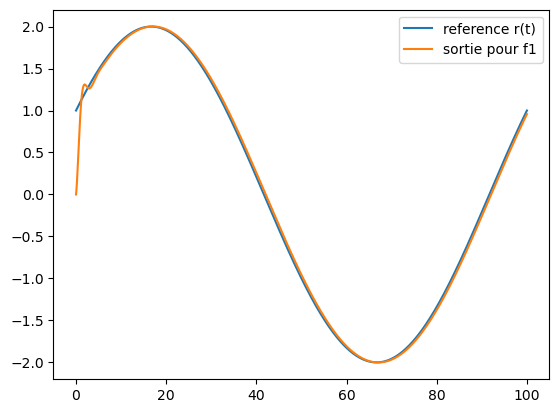

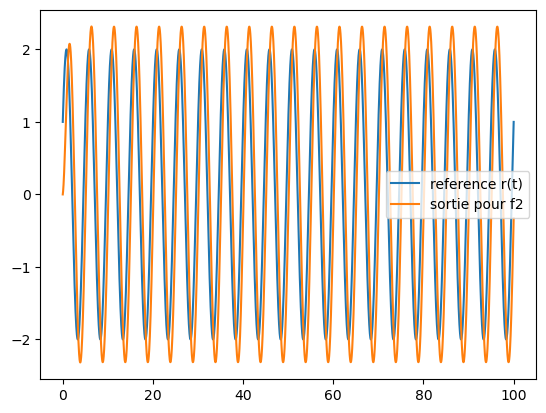

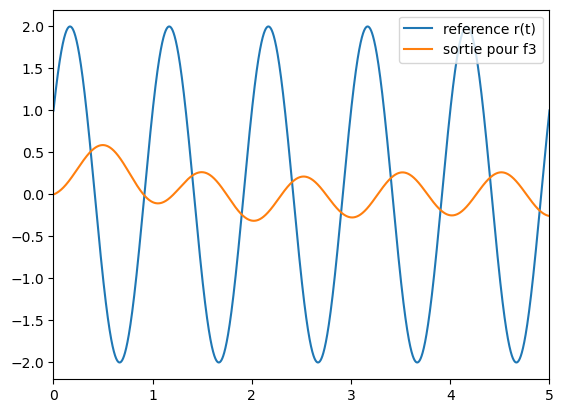

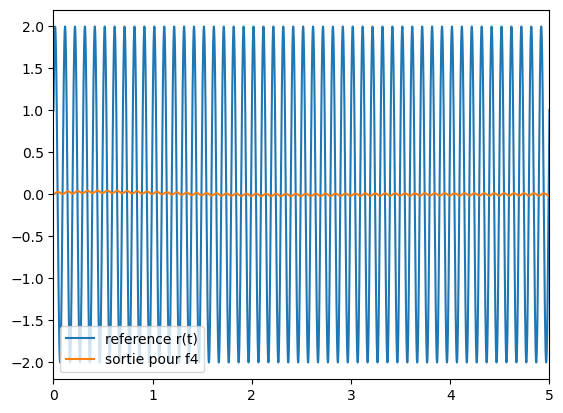

In [16]:
def r_sinus(t, f):
    return 2 * np.sin( (2*np.pi*f*t) + np.pi/6)


f1 = 0.01 # Hz
f2 = 0.2
f3 = 1
f4 = 10

t_interval = np.linspace(0, 100, 100000)

K = np.matrix([[0.132, 0.5148]])
k_r = 0.132

sol_simu_f1 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f1), K])
sol_simu_f2 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f2), K])
sol_simu_f3 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f3), K])
sol_simu_f4 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f4), K])

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f1), label='reference r(t)')
plt.plot(sol_simu_f1["t"], sol_simu_f1["y"][0], label ='sortie pour f1')


plt.legend()
plt.show()


plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f2), label='reference r(t)')   
plt.plot(sol_simu_f2["t"], sol_simu_f2["y"][0], label ='sortie pour f2')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f3), label='reference r(t)')
plt.plot(sol_simu_f3["t"], sol_simu_f3["y"][0], label ='sortie pour f3')
plt.xlim(0,5)
plt.legend()
plt.show()

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f4), label='reference r(t)')
plt.plot(sol_simu_f4["t"], sol_simu_f4["y"][0], label ='sortie pour f4')
plt.xlim(0,5)
plt.legend()
plt.show()

### 5. Représentation de Fourier

1000.0
1000.0
1000.0
1000.0


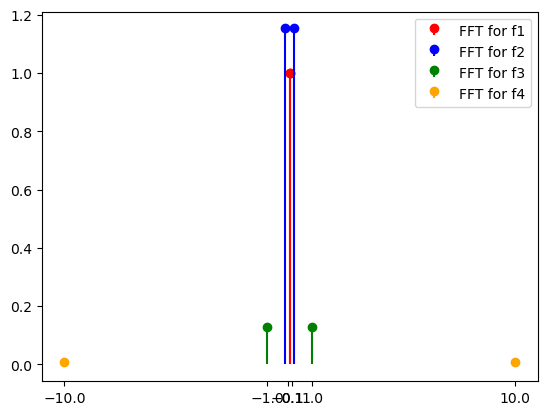

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


colors = ['red', 'blue', 'green', 'orange']

for i, y in enumerate([sol_simu_f1["y"][0], sol_simu_f2["y"][0], sol_simu_f3["y"][0], sol_simu_f4["y"][0][6000:8000]]):
    N = len(y)
    if i == 3:
        SAMPLE_RATE = N / 2
    else:
        SAMPLE_RATE = N / 100
    print(SAMPLE_RATE)
    yf = fft(y)
    xf = fftfreq(N, 1 / SAMPLE_RATE)

    yf = np.abs(yf) / N  # Normalization
    if i == 3:
        yf = np.where(np.abs(yf) > 0.001, yf, np.nan)
    else:
        yf = np.where(np.abs(yf) > 0.1, yf, np.nan)

    plt.stem(xf, np.abs(yf), basefmt=' ', linefmt=colors[i], label=f'FFT for f{i+1}')

plt.xlim(-11, 11)
plt.legend()
plt.xticks([-10, 10, -1, 1, -0.1, 0.1])
plt.show()





2000
1000.0


(-10.0, 10.0)

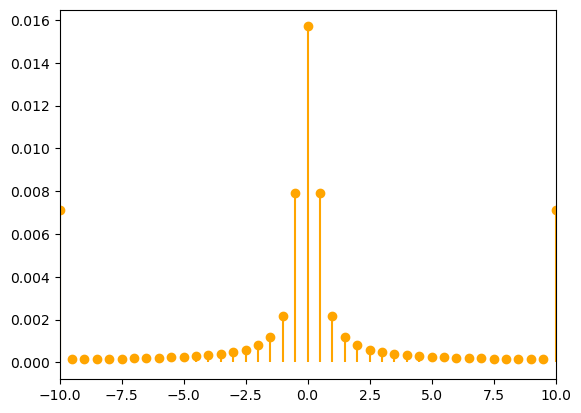

In [18]:
y = sol_simu_f4["y"][0][:2000]
x = sol_simu_f4["t"]

N = len(y)
print(N)
SAMPLE_RATE = N / 2
print(SAMPLE_RATE)
yf = fft(y)
xf = fftfreq(N, 1 / SAMPLE_RATE)

yf = np.abs(yf) / N  # Normalization
# yf = np.where(np.abs(yf) > 100, yf, 0)

plt.stem(xf, np.abs(yf), basefmt=' ', linefmt=colors[i], label=f'FFT for f{i+1}')
plt.xlim(-10, 10)